In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import random
IMG_SIZE=32

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
training_data=[]
def train_data():
  # labeling diseases
  label_covid=[1.0,0.0,0.0,0.0]  #covid
  label_pneu=[0.0,1.0,0.0,0.0] #pneumonia
  label_tube=[0.0,0.0,1.0,0.0] #turberculosis
  label_normal=[0.0,0.0,0.0,1.0] #normal

  #path of images
  drive_path=['/content/drive/MyDrive/chest x-ray/train/COVID19','/content/drive/MyDrive/chest x-ray/train/PNEUMONIA','/content/drive/MyDrive/chest x-ray/train/TURBERCULOSIS','/content/drive/MyDrive/chest x-ray/train/NORMAL']


  #Collecting training data
  #Covid
  for img in tqdm(os.listdir(drive_path[0])): 
    path=os.path.join(drive_path[0],img) #joining path of image and covid folder
    img=cv2.imread(path,cv2.IMREAD_COLOR) #reading the image
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
    training_data.append([np.array(img),np.array(label_covid)]) #trainig data (image,label)
  
  #pneumonia
  for img in tqdm(os.listdir(drive_path[1])):
    path=os.path.join(drive_path[1],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label_pneu)])
  #tuberculosis
  for img in tqdm(os.listdir(drive_path[2])):
    path=os.path.join(drive_path[2],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label_tube)])    
   #normal 
  for img in tqdm(os.listdir(drive_path[3])):
    path=os.path.join(drive_path[3],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    training_data.append([np.array(img),np.array(label_normal)])   

train_data()

100%|██████████| 1341/1341 [00:58<00:00, 22.73it/s]


In [23]:
testing_data=[]
def test_data():
  # labeling diseases
  label_covid=[1.0,0.0,0.0,0.0]  #covid
  label_pneu=[0.0,1.0,0.0,0.0] #pneumonia
  label_tube=[0.0,0.0,1.0,0.0] #turberculosis
  label_normal=[0.0,0.0,0.0,1.0] #normal

  #path of images
  drive_path=['/content/drive/MyDrive/chest x-ray/test/COVID19','/content/drive/MyDrive/chest x-ray/test/PNEUMONIA','/content/drive/MyDrive/chest x-ray/test/TURBERCULOSIS','/content/drive/MyDrive/chest x-ray/test/NORMAL']


  #Collecting training data
  #Covid
  for img in tqdm(os.listdir(drive_path[0])): 
    path=os.path.join(drive_path[0],img) #joining path of image and covid folder
    img=cv2.imread(path,cv2.IMREAD_COLOR) #reading the image
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
    testing_data.append([np.array(img),np.array(label_covid)]) #trainig data (image,label)
  
  #pneumonia
  for img in tqdm(os.listdir(drive_path[1])):
    path=os.path.join(drive_path[1],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    testing_data.append([np.array(img),np.array(label_pneu)])
  #tuberculosis
  for img in tqdm(os.listdir(drive_path[2])):
    path=os.path.join(drive_path[2],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    testing_data.append([np.array(img),np.array(label_tube)])    
   #normal 
  for img in tqdm(os.listdir(drive_path[3])):
    path=os.path.join(drive_path[3],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    testing_data.append([np.array(img),np.array(label_normal)])   

test_data()

100%|██████████| 234/234 [00:06<00:00, 33.62it/s]


In [24]:
validation_data=[]
def val_data():
  # labeling diseases
  label_covid=[1.0,0.0,0.0,0.0]  #covid
  label_pneu=[0.0,1.0,0.0,0.0] #pneumonia
  label_tube=[0.0,0.0,1.0,0.0] #turberculosis
  label_normal=[0.0,0.0,0.0,1.0] #normal

  #path of images
  drive_path=['/content/drive/MyDrive/chest x-ray/val/COVID19','/content/drive/MyDrive/chest x-ray/val/PNEUMONIA','/content/drive/MyDrive/chest x-ray/val/TURBERCULOSIS','/content/drive/MyDrive/chest x-ray/val/NORMAL']


  #Collecting training data
  #Covid
  for img in tqdm(os.listdir(drive_path[0])): 
    path=os.path.join(drive_path[0],img) #joining path of image and covid folder
    img=cv2.imread(path,cv2.IMREAD_COLOR) #reading the image
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) #resizing the image
    validation_data.append([np.array(img),np.array(label_covid)]) #trainig data (image,label)
  
  #pneumonia
  for img in tqdm(os.listdir(drive_path[1])):
    path=os.path.join(drive_path[1],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    validation_data.append([np.array(img),np.array(label_pneu)])
  #tuberculosis
  for img in tqdm(os.listdir(drive_path[2])):
    path=os.path.join(drive_path[2],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    validation_data.append([np.array(img),np.array(label_tube)])    
   #normal 
  for img in tqdm(os.listdir(drive_path[3])):
    path=os.path.join(drive_path[3],img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    validation_data.append([np.array(img),np.array(label_normal)])   

val_data()

100%|██████████| 8/8 [00:00<00:00, 38.21it/s]


In [25]:
#shuffling the data
from random import shuffle
shuffle(training_data)
print("lenght of training data:",len(training_data))
shuffle(testing_data)
print("length of testing data:",len(testing_data))
shuffle(validation_data)
print("length of validation data:",len(validation_data))

lenght of training data: 6326
length of testing data: 771
length of validation data: 38


In [26]:
# definging the independent and dependant variable

#training data
X_train=np.array([i[0] for i in training_data])
Y_train=np.array([i[1] for i in training_data])

#testing data
X_test=np.array([i[0] for i in testing_data])
Y_test=np.array([i[1] for i in testing_data])

#validation data
X_val=np.array([i[0] for i in validation_data])
Y_val=np.array([i[1] for i in validation_data])



In [27]:
print("Shape of X_train:",X_train.shape,"\nShape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape,"\nShape of Y_test:",Y_test.shape)
print("Shape of X_val:",X_val.shape,"\nShape of Y_val:",Y_val.shape)

Shape of X_train: (6326, 32, 32, 3) 
Shape of Y_train: (6326, 4)
Shape of X_test: (771, 32, 32, 3) 
Shape of Y_test: (771, 4)
Shape of X_val: (38, 32, 32, 3) 
Shape of Y_val: (38, 4)


## **Convolution neural network model**
creating a base CNN model: The input layer of shape 200*200 following with the zero-padding, Then a 2D convolution network layer and a Batch Normalization layer of momentum 0.99 and epsilon 0.001, following with the relu Activation Layer and Pooling, Finnaly a Flatten layer and a Dense layer of Softmax Activation function.




In [29]:
#cnn model

def cnn_model():
  model=tf.keras.Sequential([tf.keras.layers.InputLayer((IMG_SIZE,IMG_SIZE,3)),
                             
                             tf.keras.layers.ZeroPadding2D(padding=(3,3)),

                             tf.keras.layers.Conv2D(filters=32,kernel_size=7,strides=(1,1)),

                             tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,beta_initializer='zeros', gamma_initializer='ones',moving_mean_initializer='zeros',moving_variance_initializer='ones'),

                             tf.keras.layers.ReLU(),

                             tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid'),

                             tf.keras.layers.Flatten(),

                             tf.keras.layers.Dense(4,activation='softmax'),                             
                             
                             ])
  return model

conv_model=cnn_model() #calling the model
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']) #compliing the model

history=conv_model.fit(x=X_train,y=Y_train,epochs=50,validation_data=(X_test,Y_test),batch_size=32) #fitting the CNN model

Epoch 1/50
198/198 [==============================] - 13s 61ms/step - loss: 0.4277 - accuracy: 0.8648 - val_loss: 1.2693 - val_accuracy: 0.7134
Epoch 2/50
198/198 [==============================] - 14s 69ms/step - loss: 0.2143 - accuracy: 0.9241 - val_loss: 0.5894 - val_accuracy: 0.8054
Epoch 3/50
198/198 [==============================] - 13s 68ms/step - loss: 0.1946 - accuracy: 0.9361 - val_loss: 1.8711 - val_accuracy: 0.6667
Epoch 4/50
198/198 [==============================] - 13s 66ms/step - loss: 0.1406 - accuracy: 0.9505 - val_loss: 0.8821 - val_accuracy: 0.7860
Epoch 5/50
198/198 [==============================] - 14s 69ms/step - loss: 0.1325 - accuracy: 0.9532 - val_loss: 1.0101 - val_accuracy: 0.7471
Epoch 6/50
198/198 [==============================] - 13s 65ms/step - loss: 0.1260 - accuracy: 0.9559 - val_loss: 1.3960 - val_accuracy: 0.7328
Epoch 7/50
198/198 [==============================] - 12s 60ms/step - loss: 0.1105 - accuracy: 0.9625 - val_loss: 1.4585 - val_accuracy:

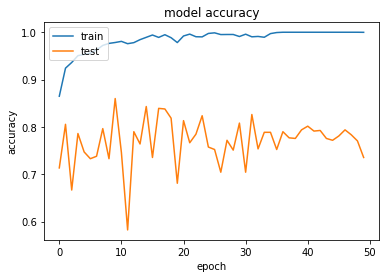

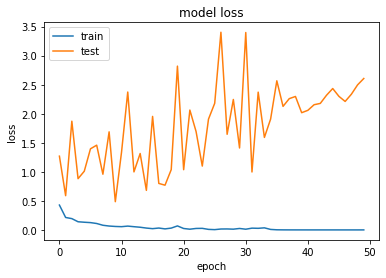

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
conv_model.save('convolution_model.h5') #Saving the CNN model
conv_model.evaluate(X_test,Y_test) #Evaluating the CNN model

25/25 [==============================] - 14s 569ms/step - loss: 37.1599 - accuracy: 0.7185


[37.15993881225586, 0.7185473442077637]

## **DenseNet Model**
Downloading the pretrained weights for the DenseNet121 model, Changing the input shape for the top layer, adding the Global-Average-pooling layer and then adding a Dense layer of Softmax Activation layer.

In [31]:
#DenseNet model

base_model=tf.keras.applications.densenet.DenseNet121(weights=r'imagenet', include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

x=(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(4, activation="softmax")(x)

densenet_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
densenet_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) #compiling the DenseNet model
history=densenet_model.fit(x=X_train,y=Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=5) #Fitting the DenseNet model


Epoch 1/5
198/198 [==============================] - 149s 686ms/step - loss: 0.2928 - accuracy: 0.9003 - val_loss: 4.1176 - val_accuracy: 0.7588
Epoch 2/5
198/198 [==============================] - 127s 643ms/step - loss: 0.1368 - accuracy: 0.9519 - val_loss: 0.5320 - val_accuracy: 0.8145
Epoch 3/5
198/198 [==============================] - 128s 646ms/step - loss: 0.2018 - accuracy: 0.9380 - val_loss: 2.0146 - val_accuracy: 0.5694
Epoch 4/5
198/198 [==============================] - 128s 649ms/step - loss: 0.1173 - accuracy: 0.9647 - val_loss: 0.6660 - val_accuracy: 0.7834
Epoch 5/5
198/198 [==============================] - 128s 646ms/step - loss: 0.0703 - accuracy: 0.9774 - val_loss: 0.6323 - val_accuracy: 0.8288


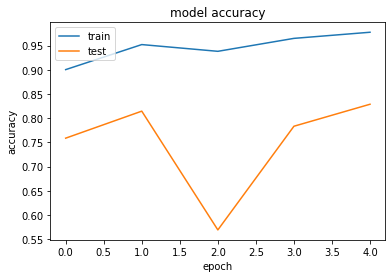

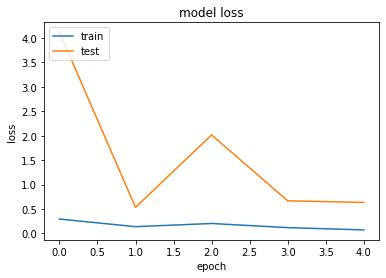

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
densenet_model.save('/content/drive/MyDrive/chest x-ray/models/DenseNet_model.h5') #Saving the DenseNet model
densenet_model.evaluate(X_test,Y_test) #evaluating the DenseNet model


25/25 [==============================] - 3s 120ms/step - loss: 0.6323 - accuracy: 0.8288


[0.632262647151947, 0.8287937641143799]

## **Efficientnet_v2**

In [34]:
#efficientnet_v2

base_model=tf.keras.applications.efficientnet_v2.EfficientNetV2B0(weights=r'imagenet', include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

x=(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(4, activation="softmax")(x)

efficientnet_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
efficientnet_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) #compiling the DenseNet model
history=efficientnet_model.fit(x=X_train,y=Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=5) #Fitting the DenseNet model


24289280/24274472 [==============================] - 0s 0us/step
Epoch 1/5
198/198 [==============================] - 97s 436ms/step - loss: 0.4241 - accuracy: 0.8525 - val_loss: 0.8124 - val_accuracy: 0.7626
Epoch 2/5
198/198 [==============================] - 89s 451ms/step - loss: 0.1627 - accuracy: 0.9450 - val_loss: 0.7139 - val_accuracy: 0.8314
Epoch 3/5
198/198 [==============================] - 89s 450ms/step - loss: 0.1096 - accuracy: 0.9682 - val_loss: 0.7644 - val_accuracy: 0.8119
Epoch 4/5
198/198 [==============================] - 88s 445ms/step - loss: 0.0759 - accuracy: 0.9749 - val_loss: 0.9145 - val_accuracy: 0.8016
Epoch 5/5
198/198 [==============================] - 89s 450ms/step - loss: 0.0727 - accuracy: 0.9744 - val_loss: 0.9202 - val_accuracy: 0.8042


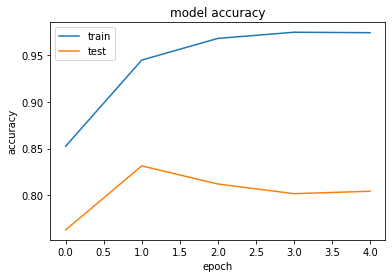

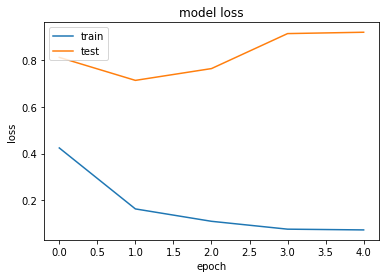

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
efficientnet_model.save('Efficientnet_model.h5') #Saving 
efficientnet_model.evaluate(X_test,Y_test) #evaluating 


25/25 [==============================] - 1s 51ms/step - loss: 0.9202 - accuracy: 0.8042


[0.9202330112457275, 0.8041504621505737]

## **MobileNetV2**

In [39]:
#MobileNetV2

base_model=tf.keras.applications.mobilenet_v2.MobileNetV2(weights=r'imagenet', include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

x=(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(4, activation="softmax")(x)

MobileNetV2_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
MobileNetV2_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) #compiling the DenseNet model
history=MobileNetV2_model.fit(x=X_train,y=Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=5) #Fitting the DenseNet model


Epoch 1/5
198/198 [==============================] - 57s 263ms/step - loss: 0.5324 - accuracy: 0.8244 - val_loss: 22.1293 - val_accuracy: 0.5058
Epoch 2/5
198/198 [==============================] - 51s 258ms/step - loss: 0.2512 - accuracy: 0.9102 - val_loss: 10.2159 - val_accuracy: 0.5058
Epoch 3/5
198/198 [==============================] - 52s 263ms/step - loss: 0.1873 - accuracy: 0.9377 - val_loss: 10.0063 - val_accuracy: 0.5058
Epoch 4/5
198/198 [==============================] - 52s 263ms/step - loss: 0.1711 - accuracy: 0.9418 - val_loss: 9.1128 - val_accuracy: 0.5058
Epoch 5/5
198/198 [==============================] - 52s 261ms/step - loss: 0.1473 - accuracy: 0.9531 - val_loss: 11.1258 - val_accuracy: 0.5058


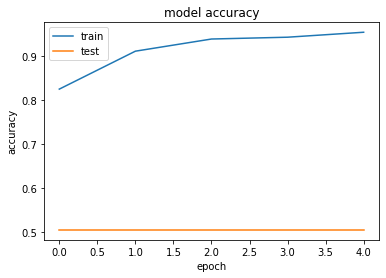

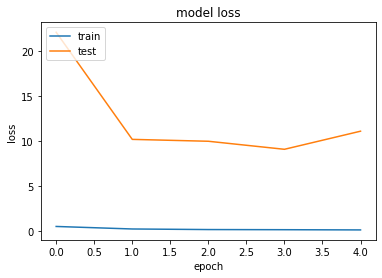

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
MobileNetV2_model.save('MobileNetV2_model.h5') #Saving 
MobileNetV2_model.evaluate(X_test,Y_test) #evaluating 


25/25 [==============================] - 1s 32ms/step - loss: 11.1258 - accuracy: 0.5058


[11.125798225402832, 0.505836546421051]

## **ResNet50**

In [42]:
#ResNet50

base_model=tf.keras.applications.resnet50.ResNet50(weights=r'imagenet', include_top=False,input_shape=(IMG_SIZE,IMG_SIZE,3))

x=(base_model.output)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

predictions = tf.keras.layers.Dense(4, activation="softmax")(x)

ResNet50_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
ResNet50_model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy']) #compiling the DenseNet model
history=ResNet50_model.fit(x=X_train,y=Y_train,batch_size=32,validation_data=(X_test,Y_test),epochs=5) #Fitting the DenseNet model


94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/5
198/198 [==============================] - 465s 2s/step - loss: 0.4315 - accuracy: 0.8773 - val_loss: 0.7356 - val_accuracy: 0.8353
Epoch 2/5
198/198 [==============================] - 455s 2s/step - loss: 0.2609 - accuracy: 0.9187 - val_loss: 1.2330 - val_accuracy: 0.7380
Epoch 3/5
198/198 [==============================] - 452s 2s/step - loss: 0.1625 - accuracy: 0.9478 - val_loss: 0.7886 - val_accuracy: 0.8132
Epoch 4/5
198/198 [==============================] - 453s 2s/step - loss: 0.1037 - accuracy: 0.9654 - val_loss: 1.0186 - val_accuracy: 0.7393
Epoch 5/5
198/198 [==============================] - 452s 2s/step - loss: 0.0821 - accuracy: 0.9738 - val_loss: 0.8042 - val_accuracy: 0.8171


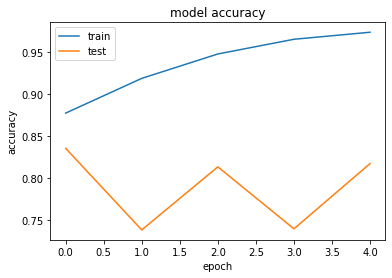

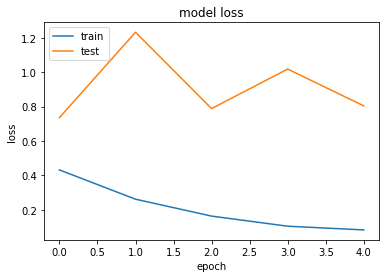

In [43]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
ResNet50_model.save('ResNet50_model.h5') #Saving 
ResNet50_model.evaluate(X_test,Y_test) #evaluating 


25/25 [==============================] - 3s 137ms/step - loss: 0.8042 - accuracy: 0.8171


[0.8041804432868958, 0.8171206116676331]

In [54]:
# Defining the process function for processing the imaes while testing 
def process(path):
  img=cv2.imread(path,cv2.IMREAD_COLOR)
  img=cv2.resize(img,(32,32))
  x=img
  img=np.expand_dims(img,axis=0)
  return img,x
def pred_list(pred):
  pred_list=[]
  for i in pred[0]:
    x=format(i,'.8f')
    pred_list.append(x)
  return pred_list

def disease(pred_list):
  x=np.argmax(pred_list)
  if x==0:
    print("Disease: Covid")
  elif x==1:
    print("Disease: Pneumonia")
  elif x==2:
    print("Disease: Turberculosis")
  elif x==3:
    print("Normal")
    
  

['0.00010568', '0.99940252', '0.00034878', '0.00014292']
Disease: Pneumonia


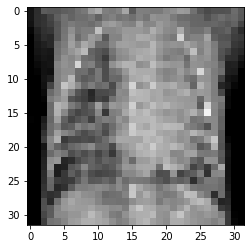

In [57]:
path='/content/drive/MyDrive/chest x-ray/test/PNEUMONIA/person100_bacteria_475.jpeg'
img,x=process(path)
pred=densenet_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)

['0.00064523', '0.00503277', '0.00107156', '0.99325049']
Normal


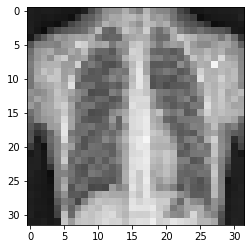

In [58]:
path='/content/drive/MyDrive/chest x-ray/test/NORMAL/IM-0001-0001.jpeg'
img,x=process(path)
pred=densenet_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)

['0.57782960', '0.33476931', '0.06377076', '0.02363038']
Disease: Covid


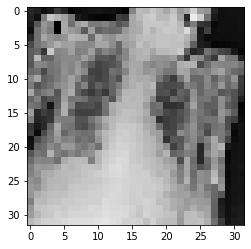

In [59]:
path='/content/drive/MyDrive/chest x-ray/test/COVID19/COVID19(460).jpg'
img,x=process(path)
pred=densenet_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)

['0.00008849', '0.00003222', '0.99987280', '0.00000648']
Disease: Turberculosis


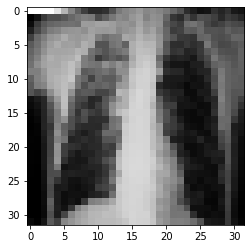

In [60]:
path='/content/drive/MyDrive/chest x-ray/test/TURBERCULOSIS/Tuberculosis-660.png'
img,x=process(path)
pred=densenet_model.predict(img)
pred=pred_list(pred)
print(pred)
disease(pred)
plt.imshow(x)